# Метрики классификации

##  Accuracy - метрика коварная

Самая простая и интуитивная метрика для оценка качества классификации - это accuracy, доля правильных ответов.
Качество классификации всегда оценивается по тестовой выборке, поэтому есть два массива: 
- настоящие значения (y_real или y_test)
- спрогнозированные моделью значения (y_pred)

Количество совпадений в прогнозах - это числитель в accuracy; знаменатель - это количество объектов, для которых мы сделали прогноз

$$ Accuracy = \frac{количество\:совпадений\:в\:прогнозах}{количество\:элементов} $$

Accuracy измеряется от 0 до 1. Чем ближе к 1, тем лучше: модель смогла правильно классифицировать объекты

## Матрица ошибок

4 показателя (TP, Fp, TN, FN) собираются в одну таблицу, которая называется матрицей ошибок. 

В библиотке sklearn матрица собирается следующим образом:
- по горизонтали расположены истинные метки класса от 0 до 1
- по вертикали - метки алгоритма от 0 до 1

Соответственно, 
- на диагонали стоят все правильные прогнозы
    - в левом верхнем углу TN
    - в правом нижнем углу TP
- вне диагонали - ошибочные варианты:
    - в правом верхнем углу расположились FP-ответы
    - в левом нижнем углу - TN-ответы

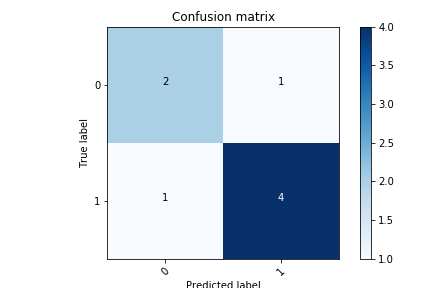
Совет, потратьте немного времени, чтобы понять, как устроена матрица ошибок - это поможет вам, когда вы увидите ее по-другому собранную. 

## Recall
Для оценка качества прогноза целевого класса можно использовать метрику полноты, или Recall. 
Она показывает, какую долю положительных ответов смог выделить классификатор. 

На примере нашей задачи: 
- есть 100 человек, которые обратились за страховой компенсацией. 
- 20 из них модель распознала и посчитала обращающимися за страховкой. 
- Тогда Recall для таких цифр - 0.2

По матрице ошибок легко и быстро Recall можно рассчитывать по формуле: 
$$ Recall = \frac{TP}{TP + FN}$$

Это доля TP-ответов среди всех, у кого истинная метка - 1: сумма TP + FN

## Precision

Качество прогноза целевого класса можно оценить метрикой точности, или Precision. 
Это доля корректных положительных меток среди всех положительных меток модели. 

На примере нашей задачи: 
- есть 100 человек, которые по мнению модели обратятся за страховкой
- 20 из них действительно обратились за компенсацией. 
- Тогда Precision  - 0.2

По матрице ошибок легко и быстро Precision можно рассчитывать по формуле: 

$$ Precision = \frac{TP}{TP + FP}$$

Корректные положительные метки - это TP, а все положительные метки, присвоенные классификатором - это TP и FP

## F1-score

Полнота и точность оценивают качество прогноза класса 1 из-под разных углов: точность показывает адекватность модели, не переусердствует ли она, присваивая положительные метки; полнота же описывает, как глубоко модель смогла разобраться в особенностях класса 1 и распознать его.

Обе метрики - важные. Чтобы контролировать их параллельно, придуманы агрегирующие метрики. Одна из них - F1-мера или F1-score. Это среднегармонические полноты и точности. 

$$ F1 = \frac{2PR}{R + P}$$

Среднегармоническое обладает важным свойством: когда один из составляющих близок к нулю, само среднее гармоническое близится к нулю.
Т.е. если мы под любым углом плохо прогнозируем класс 1, то F1-мера близостью к нулю сразу покажет. 

## Задачи без ноутбука

### 1. Метрики классификации

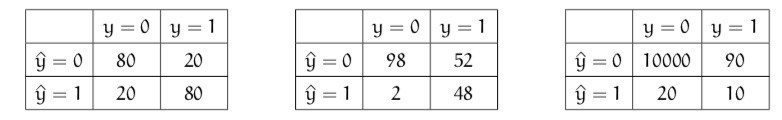

### 2. AUC

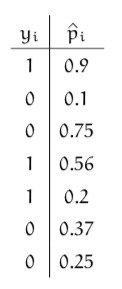

## Задачи по метрикам классификации с Python

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, roc_curve, auc

In [ ]:
import pandas as pd              
import numpy as np 
import itertools
import matplotlib.pyplot as plt   
import matplotlib
import seaborn as sns             
plt.style.use('ggplot')           

%matplotlib inline

### Задача 1. Сгенерируйте две выборки:
- y_proba - случайный вектор длины 100, от 0 до 1
- y_true - случайный вектор длины 100, состоящий из 0 и 1

Из **y_proba** получите предсказания 0 или 1, если порог - 0.6 и сохраните в вектор **y_pred**


### Задача 2. Считаем метрики:
- Accuracy
- Precision
- Recall
- ROC-AUC

### Задача 3. Визуализация ROC и Recall-кривых

In [ ]:
# Функция для отрисовки confusion_matrix  

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.figure(figsize=(5, 5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=18)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=16)
    plt.yticks(tick_marks, classes, fontsize=16)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black", fontsize=30)

    plt.tight_layout()
    plt.ylabel('True label', fontsize=16)
    plt.xlabel('Predicted label', fontsize=16)
    pass

# Функция для отрисовки roc-auc кривой    
def roc_auc_pic(y_hat_test, y_test):    
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_hat_test)
    roc_auc_test = roc_auc_score(y_test, y_hat_test)

    matplotlib.rcParams['figure.figsize'] = (8, 8)
    plt.plot(fpr_test, tpr_test, label='Test ROC AUC {0}'.format(roc_auc_test))
    plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6))
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show() 
    pass


# Картинки для PR-кривой, а-меры
def plot_precision_recall_curve(y_pred_proba, y_test):
    plt.figure(figsize=(10, 10))
    f_scores = np.linspace(0.4, 0.9, num=6)
    lines = []
    labels = []
    for f_score in f_scores:
        x = np.linspace(0.01, 1)
        y = f_score * x / (2 * x - f_score)
        l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
        plt.annotate('f1={0:0.2f}'.format(f_score), xy=(0.9, y[45] + 0.02))
    precision, recall, _ =  precision_recall_curve(y_test, y_pred_proba)

    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2,
                     color='b')
    plt.xlabel('Recall', size=15)
    plt.ylabel('Precision', size=15)
    plt.title('Precision-Recall curve', size=18)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.show()

- Визуализируйте ROC-кривую

- Визуализируйте PR-кривую

## Обработка категориальных и текстов переменных

In [ ]:
data = pd.read_csv('../data/youtube_data.csv', sep = '\t')
data.head()

In [ ]:
data.info()

Можно заметить, что некоторые данные у нас отсутствуют. Давайте посмотрим на заполненность нашей таблички на картинке. 

In [ ]:
fig, ax = plt.subplots(figsize=(20,12))
sns_heatmap = sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

### Предобработка текста

- Токенизация: выделение отдельных слов
- Нормализация: приведение слов к начальному виду (гуляли, гуляла, гуляю - это все формы слова "гулять")

Стэмминг и лемматизация - подходы к нормализации слов. При стэмминге отбрасываем окончания слов, при лемматизации действуем на основе словаря.

### Модель мешка слов и TF-IDF

<img src ="http://archimedes.fas.harvard.edu/presentations/2002-03-09/img13.gif">

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [ ]:
corpus = []
for i in range(0, data.shape[0]):
    
    description = re.sub('[^a-zA-Z]', ' ', data['description'][i])
    description = description.lower()
    description = description.split()
    ps = PorterStemmer()
    description = [ps.stem(word) for word in description if not word in set(stopwords.words('english'))]
    description = ' '.join(description)
    corpus.append(description)
    
cv = CountVectorizer()
X = cv.fit_transform(corpus)

### OHE 

Представим, что у нас есть колонка пол, в котором три уникальных значения: F, M, None.
Чтобы оцифровать эту колонку, мы применим технику One Hot Encoding, OHE. 

OHE работает так:
- подсчитывается количество уникальных категорий (N)
- создается N новых столбцов - каждый столбец отвечает за каждую категорию
- каждый столбец заполняется нулями или единицами; 1 - если категория подходит объекту, 0 - если объект другой категории.

Каждая колонка, которую мы создали - это дамми-переменная. Так называются переменные, которые принимают значение 1 и 0 и кодируют категориальные данные. 

На рисунке вы видите пример OHE для небольшого среза столбца Gender. Добавились три колонки. Если страхующийся был мужчиной, то в столбце Gender_M вписана единица, а в двух других - нули.

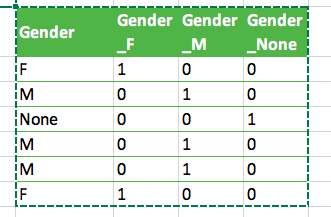

In [ ]:
data = pd.get_dummies(data, drop_first=True)

### Теория - LabelEncoder

Некоторым моделям достаточно, чтобы  категории были закодированы цифрами. Надо зафиксировать, какой цифрой кодируем класс, и переразметить колонку. Процедура называется Label Encoding.

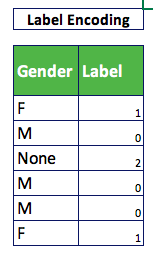

Label Encoding реализован в sklearn функцией LabelEncoder.

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()